#Stack market prediction using LSTM

#1) Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
stock_dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
stock_dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


#2)Exploring datasets

In [48]:
stock_dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
stock_dataset.sort_values(by=["Date"], inplace=True, ascending=True)
stock_dataset.Date.head()

2034    2010-07-21
2033    2010-07-22
2032    2010-07-23
2031    2010-07-26
2030    2010-07-27
Name: Date, dtype: object

In [49]:
stock_dataset.sort_values(by=["Date"], inplace=True, ascending=True)
stock_dataset.Date.head()

2034    2010-07-21
2033    2010-07-22
2032    2010-07-23
2031    2010-07-26
2030    2010-07-27
Name: Date, dtype: object

#3)Visualising datasets

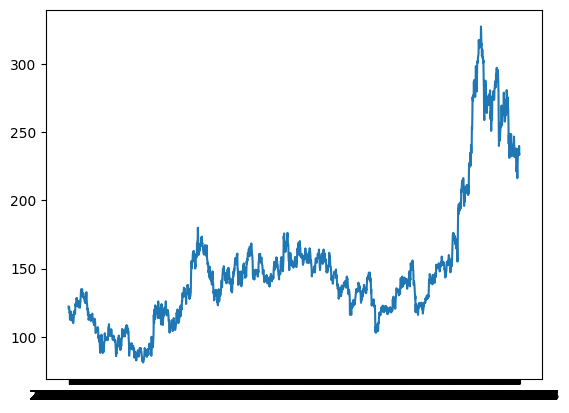

In [5]:
newdate = stock_dataset["Date"]
newdate
newopen = stock_dataset["Open"]
newdate
plt.plot(newdate,newopen)

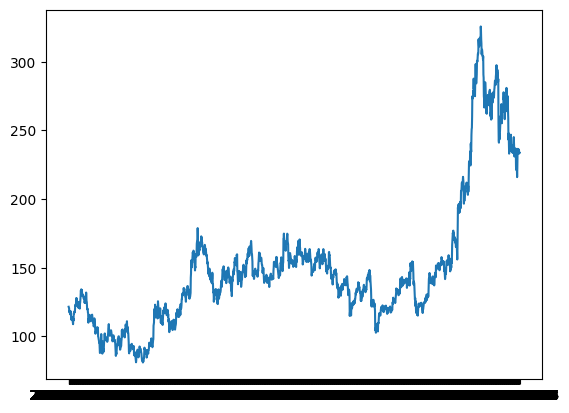

In [6]:
newdate = stock_dataset["Date"]
newdate
newclose = stock_dataset["Close"]
newdate
plt.plot(newdate,newclose)

#4)Feature scaling:Normalize it from 0 to 1

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))


#Because we are going to make prediction on th basis of closing price
close_price = stock_dataset["Close"]

close_price = np.array(close_price).reshape(-1 , 1)


transformed_closed_value =  scaler.fit_transform(close_price)

df = transformed_closed_value

df.shape

(2035, 1)

#5)Training and testing

In [8]:
training_data_length = int(0.6 * len(df))
testing_data_length  = int(len(df) - training_data_length)

In [9]:
training_data = df[:training_data_length]
testing_data  = df[training_data_length:]

In [10]:
print(f"size of training data is {len(training_data)} and testing data is {len(testing_data)} ")

1221+814

size of training data is 1221 and testing data is 814 


2035

In [11]:
def create_dataset(dataset , n_dataset_length):
    X =[]
    Y =[]
    for i in range(len(dataset) - n_dataset_length - 1):
        X.append(dataset[i:i + n_dataset_length , 0])
        Y.append(dataset[i + n_dataset_length , 0])
    return np.array(X) , np.array(Y)

In [12]:
n_dataset_length = 50

X_training , Y_training = create_dataset(training_data , n_dataset_length)
X_testing , Y_testing   = create_dataset(testing_data , n_dataset_length)

#6)Creating LSTM model

In [13]:
print(X_training.shape) , print(X_testing.shape) , print(Y_training.shape) , print(Y_testing.shape)

(1170, 50)
(763, 50)
(1170,)
(763,)


(None, None, None, None)

In [14]:
X_training = X_training.reshape(X_training.shape[0] , X_training.shape[1] , 1)
X_testing  = X_testing.reshape(X_testing.shape[0] , X_testing.shape[1] , 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

mdl = Sequential()

# Optionally, the first layer can receive an `input_shape` argument
mdl.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

#inner layer
mdl.add(LSTM(50, return_sequences=True))
mdl.add(LSTM(50))

#output layer
mdl.add(Dense(1))

mdl.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


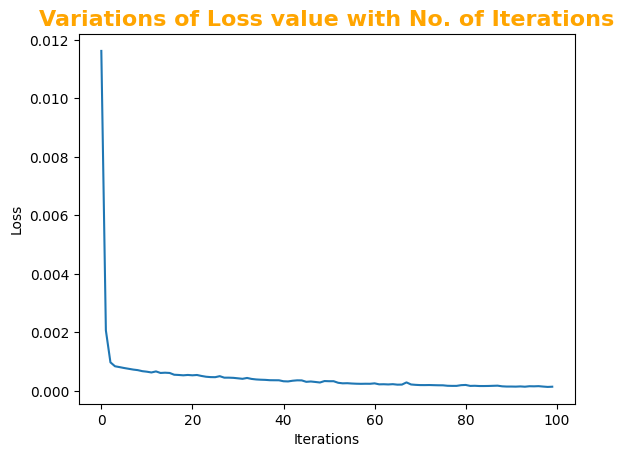

In [18]:
loss = mdl.history.history['loss']
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

In [19]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
train_preds = scaler.inverse_transform(mdl.predict(X_training))

test_preds = scaler.inverse_transform(mdl.predict(X_testing))

24/24 [==============================] - 1s 23ms/step


In [21]:
train_preds.shape

(1170, 1)

#7)Visualization of comparison

Text(0, 0.5, 'Closing Price')

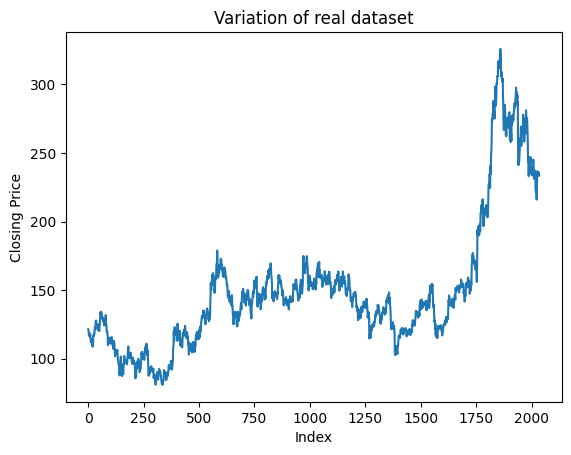

In [22]:
plt.plot(scaler.inverse_transform(df))
plt.title("Variation of real dataset")
plt.xlabel("Index")
plt.ylabel("Closing Price")

In [23]:
#shifting trained predictions for plotting
#putting actual and predicted in same curve
look_back = 50

#The empty_like() function is used to create a new array with the same shape and type as a given array.
trainPredictPlot = np.empty_like(df)

#nan (Empty value are assigned in the all place of trainPredictPlot)
trainPredictPlot[:,:] = np.nan


#Because predictoin started from 50th point onwards prediction (y) starts from 51th
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds


#doing same for the testing data
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(df)-1, :] = test_preds

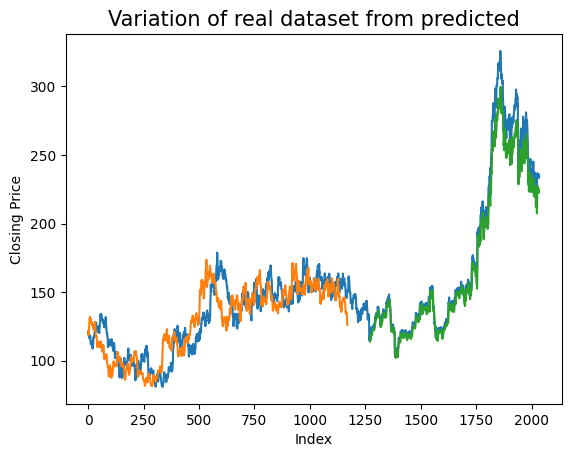

In [24]:
plt.plot(scaler.inverse_transform(df))
plt.plot(train_preds)
plt.title("Variation of real dataset from predicted",fontsize = "15")
plt.xlabel("Index")
plt.ylabel("Closing Price")
plt.plot(testPredictPlot)
plt.show()

#8)Predicting future data

In [25]:
len(X_training) , len(X_testing)

(1170, 763)

In [26]:
preds_input = testing_data[764:]
preds_input.shape

(50, 1)

In [27]:
preds_input = preds_input.reshape(1, -1)

In [28]:
temp_input = list(preds_input)
len(temp_input)

1

In [29]:
temp_input = temp_input[0].tolist()

In [30]:
len(temp_input)

50

In [31]:
Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>50):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input)
        preds_input=preds_input.reshape(1,-1)



    preds_input = preds_input.reshape(1, n_dataset_length,1)
    day_output = mdl.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist()) # Put in inpu i,e original
    Thirty_days_output.extend(day_output.tolist()) #Put in 30 days array

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

In [32]:
Thirty_days_output

[[0.579939603805542],
 [0.5350858569145203],
 [0.49198389053344727],
 [0.45871543884277344],
 [0.43558236956596375],
 [0.42022764682769775],
 [0.4094814360141754],
 [0.4006615877151489],
 [0.39207199215888977],
 [0.3829677402973175],
 [0.3732766807079315],
 [0.36326977610588074],
 [0.3532921373844147],
 [0.34361007809638977],
 [0.3343539834022522],
 [0.3255336284637451],
 [0.3170803189277649],
 [0.3088964521884918],
 [0.30089041590690613],
 [0.2929958999156952],
 [0.2851782441139221],
 [0.27742910385131836],
 [0.2697581946849823],
 [0.2621838450431824],
 [0.2547256648540497],
 [0.24739891290664673],
 [0.2402142435312271],
 [0.23317693173885345],
 [0.22629012167453766],
 [0.21955184638500214]]

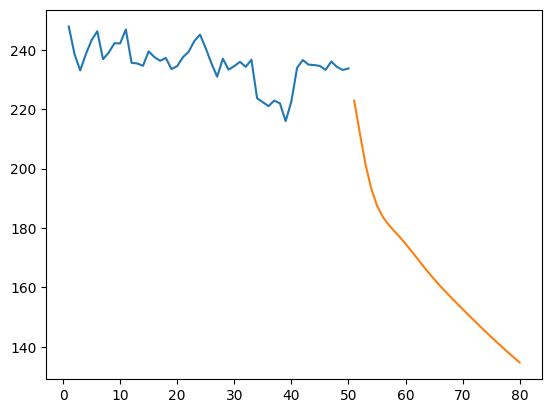

In [39]:
new_50_days = np.arange(1,51)
predicted_30_days = np.arange(51,81)

new_50_days_output = df[1985:]
plt.plot(new_50_days, scaler.inverse_transform(new_50_days_output))
plt.plot(predicted_30_days, scaler.inverse_transform(Thirty_days_output));